In [1]:
%cd /content/drive/MyDrive/Colab Notebooks/kalman_filter

/content/drive/MyDrive/Colab Notebooks/kalman_filter


In [2]:
!unzip -qq "/content/drive/MyDrive/Colab Notebooks/kalman_filter/source.zip"

replace 16.CompFilter/ArsAccel.mat? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## 평균필터

In [36]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [38]:
def get_volt():
    """Measure voltage."""
    v = np.random.normal(0, 4)  # v: measurement noise.
    volt_mean = 14.4            # volt_mean: mean (nominal) voltage [V].
    volt_meas = volt_mean + v   # volt_meas: measured voltage [V] (observable).
    return volt_meas

In [39]:
def avg_filter(k, x_meas, x_avg):
    """Calculate average voltage using a average filter."""
    alpha = (k - 1) / k
    x_avg = alpha * x_avg + (1 - alpha) * x_meas
    return x_avg

In [40]:
# Input parameters.
time_end = 10
dt = 0.2

In [41]:
time = np.arange(0, time_end, dt)
n_samples = len(time)
x_meas_save = np.zeros(n_samples)
x_avg_save = np.zeros(n_samples)

In [42]:
x_meas_save

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [43]:
x_avg_save

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [44]:
x_avg = 0
for i in range(n_samples):
    k = i + 1
    x_meas = get_volt()   # 측정된 전압 -> 15.947609991437048
    x_avg = avg_filter(k, x_meas, x_avg)  #(1,15.947609991437048, 0)

    x_meas_save[i] = x_meas # 15.947609991437048
    x_avg_save[i] = x_avg  # 15.947609991437048

In [45]:
x_meas = get_volt()

In [46]:
x_meas_save[1]

16.000628833468895

In [47]:
x_avg_save[1]

18.728419108669776

Text(0, 0.5, 'Volt [V]')

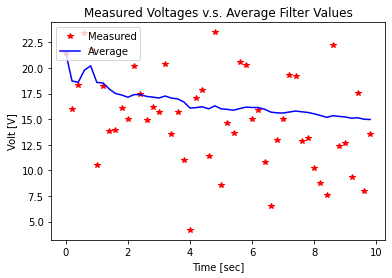

In [48]:
plt.plot(time, x_meas_save, 'r*', label='Measured')
plt.plot(time, x_avg_save, 'b-', label='Average')
plt.legend(loc='upper left')
plt.title('Measured Voltages v.s. Average Filter Values')
plt.xlabel('Time [sec]')
plt.ylabel('Volt [V]')
#plt.savefig('png/average_filter.png')

## 이동평균 필터

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io

In [50]:
input_mat = io.loadmat('/content/drive/MyDrive/Colab Notebooks/kalman_filter/2.MovAvgFilter/SonarAlt.mat')

In [51]:
def get_sonar(i):
    """Measure sonar."""
    z = input_mat['sonarAlt'][0][i]  # input_mat['sonaralt']: (1, 1501)
    return z

In [52]:
input_mat['sonarAlt'].shape

(1, 1501)

In [53]:
input_mat['sonarAlt'][0][0]

34.2549125576344

In [54]:
input_mat['sonarAlt'][0][1500]

36.55540305115126

In [55]:
input_mat

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Thu Feb 25 13:19:03 2010',
 '__version__': '1.0',
 'sonarAlt': array([[34.25491256, 33.60223519, 33.60223519, ..., 36.55540305,
         36.55540305, 36.55540305]])}

In [56]:
def mov_avg_filter(x_n, x_meas):
    """Calculate average sonar using a moving average filter (batch expression)."""
    n = len(x_n)
    for i in range(n-1):
        x_n[i] = x_n[i+1]
    x_n[n-1] = x_meas
    x_avg = np.mean(x_n)
    return x_avg, x_n

In [57]:
# Input parameters.
n = 10
n_samples = 500
time_end = 10

In [58]:
dt = time_end / n_samples
time = np.arange(0, time_end, dt)
x_meas_save = np.zeros(n_samples)
x_avg_save = np.zeros(n_samples)

In [59]:
for i in range(n_samples):
    x_meas = get_sonar(i)
    if i == 0:
        x_avg, x_n = x_meas, x_meas * np.ones(n)
    else:
        x_avg, x_n = mov_avg_filter(x_n, x_meas)

    x_meas_save[i] = x_meas
    x_avg_save[i] = x_avg

In [60]:
get_sonar(0)

34.2549125576344

In [61]:
x_n

array([91.45882706, 91.45882706, 91.45882706, 86.83058068, 86.83058068,
       84.91039196, 90.92215311, 84.91039196, 85.38303334, 87.32323009])

Text(0, 0.5, 'Altitude [m]')

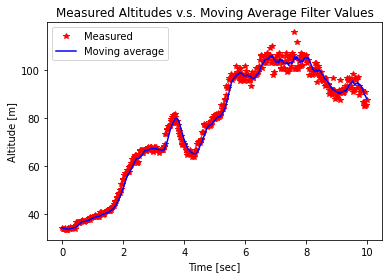

In [62]:
plt.plot(time, x_meas_save, 'r*', label='Measured')
plt.plot(time, x_avg_save, 'b-', label='Moving average')
plt.legend(loc='upper left')
plt.title('Measured Altitudes v.s. Moving Average Filter Values')
plt.xlabel('Time [sec]')
plt.ylabel('Altitude [m]')
#plt.savefig('png/moving_average_filter.png')

## 저주파 통과 필터

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io

In [64]:
input_mat = io.loadmat('/content/drive/MyDrive/Colab Notebooks/kalman_filter/2.MovAvgFilter/SonarAlt.mat')

In [65]:
def get_sonar(i):
    """Measure sonar."""
    z = input_mat['sonarAlt'][0][i]  # input_mat['sonaralt']: (1, 1501)
    return z

In [66]:
def low_pass_filter(x_meas, x_esti):
    """Calculate average sonar using a low-pass filter."""
    x_esti = alpha * x_esti + (1 - alpha) * x_meas
    return x_esti

In [67]:
# Input parameters.
alpha = 0.7
n_samples = 500
time_end = 10

In [70]:
dt = time_end / n_samples
time = np.arange(0, time_end, dt)
x_meas_save = np.zeros(n_samples)
x_esti_save = np.zeros(n_samples)

In [71]:
x_esti = None
for i in range(n_samples):
    x_meas = get_sonar(i)
    if i == 0:
        x_esti = x_meas
    else:
        x_esti = low_pass_filter(x_meas, x_esti) # (33.60223519111186,34.2549125576344)

    x_meas_save[i] = x_meas  # 33.60223519111186
    x_esti_save[i] = x_esti  # 34.059109347677634

In [72]:
x_esti_save[1]

34.059109347677634

Text(0, 0.5, 'Altitude [m]')

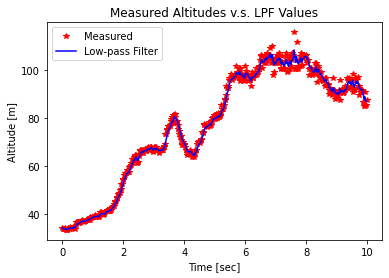

In [73]:
plt.plot(time, x_meas_save, 'r*', label='Measured')
plt.plot(time, x_esti_save, 'b-', label='Low-pass Filter')
plt.legend(loc='upper left')
plt.title('Measured Altitudes v.s. LPF Values')
plt.xlabel('Time [sec]')
plt.ylabel('Altitude [m]')

In [74]:
# low_alpha vs high_alpha

alpha = 0.4
n_samples = 500
time_end = 10


In [75]:
dt = time_end / n_samples
time = np.arange(0, time_end, dt)
x_meas_save_low = np.zeros(n_samples)
x_esti_save_low = np.zeros(n_samples)

In [76]:
x_esti = None
for i in range(n_samples):
    x_meas = get_sonar(i)
    if i == 0:
        x_esti = x_meas
    else:
        x_esti = low_pass_filter(x_meas, x_esti)  

    x_meas_save_low[i] = x_meas  
    x_esti_save_low[i] = x_esti

In [77]:
alpha = 0.9
n_samples = 500
time_end = 10

In [78]:
dt = time_end / n_samples
time = np.arange(0, time_end, dt)
x_meas_save_high = np.zeros(n_samples)
x_esti_save_high = np.zeros(n_samples)

In [79]:
x_esti = None
for i in range(n_samples):
    x_meas = get_sonar(i)
    if i == 0:
        x_esti = x_meas
    else:
        x_esti = low_pass_filter(x_meas, x_esti)  

    x_meas_save_high[i] = x_meas  
    x_esti_save_high[i] = x_esti

Text(0, 0.5, 'Altitude [m]')

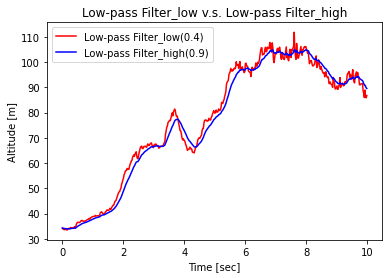

In [80]:
plt.plot(time, x_esti_save_low, 'r-', label='Low-pass Filter_low(0.4)')
plt.plot(time, x_esti_save_high, 'b-', label='Low-pass Filter_high(0.9)')
plt.legend(loc='upper left')
plt.title('Low-pass Filter_low v.s. Low-pass Filter_high')
plt.xlabel('Time [sec]')
plt.ylabel('Altitude [m]')